# Import essentials

In [2]:
# For Data Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For traning and testing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

---
# Loading data from .CSV file

In [3]:
data = pd.read_csv("datasets/boston_housing.csv")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


---
# Diplaying correlation matrix (Heatmap)

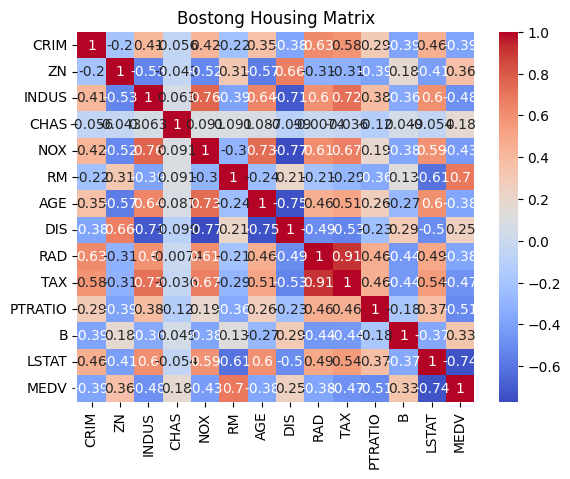

In [4]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Bostong Housing Matrix")
plt.style.use("dark_background")
plt.show()

___
# Selecting important features

1. The obvious feature is __MEDV__ - the price of house. We need to predict this one using rest.
2. The features that a closer to 1 or -1 on the column of __MEDV__ has more probable effect on price.
3. They final choices are:  [__'RM', 'ZN', 'DIS', 'B', 'LSTAT', 'MEDV']__

---
# Pairplotting selected features
Now we need to visualise the data to find patterns

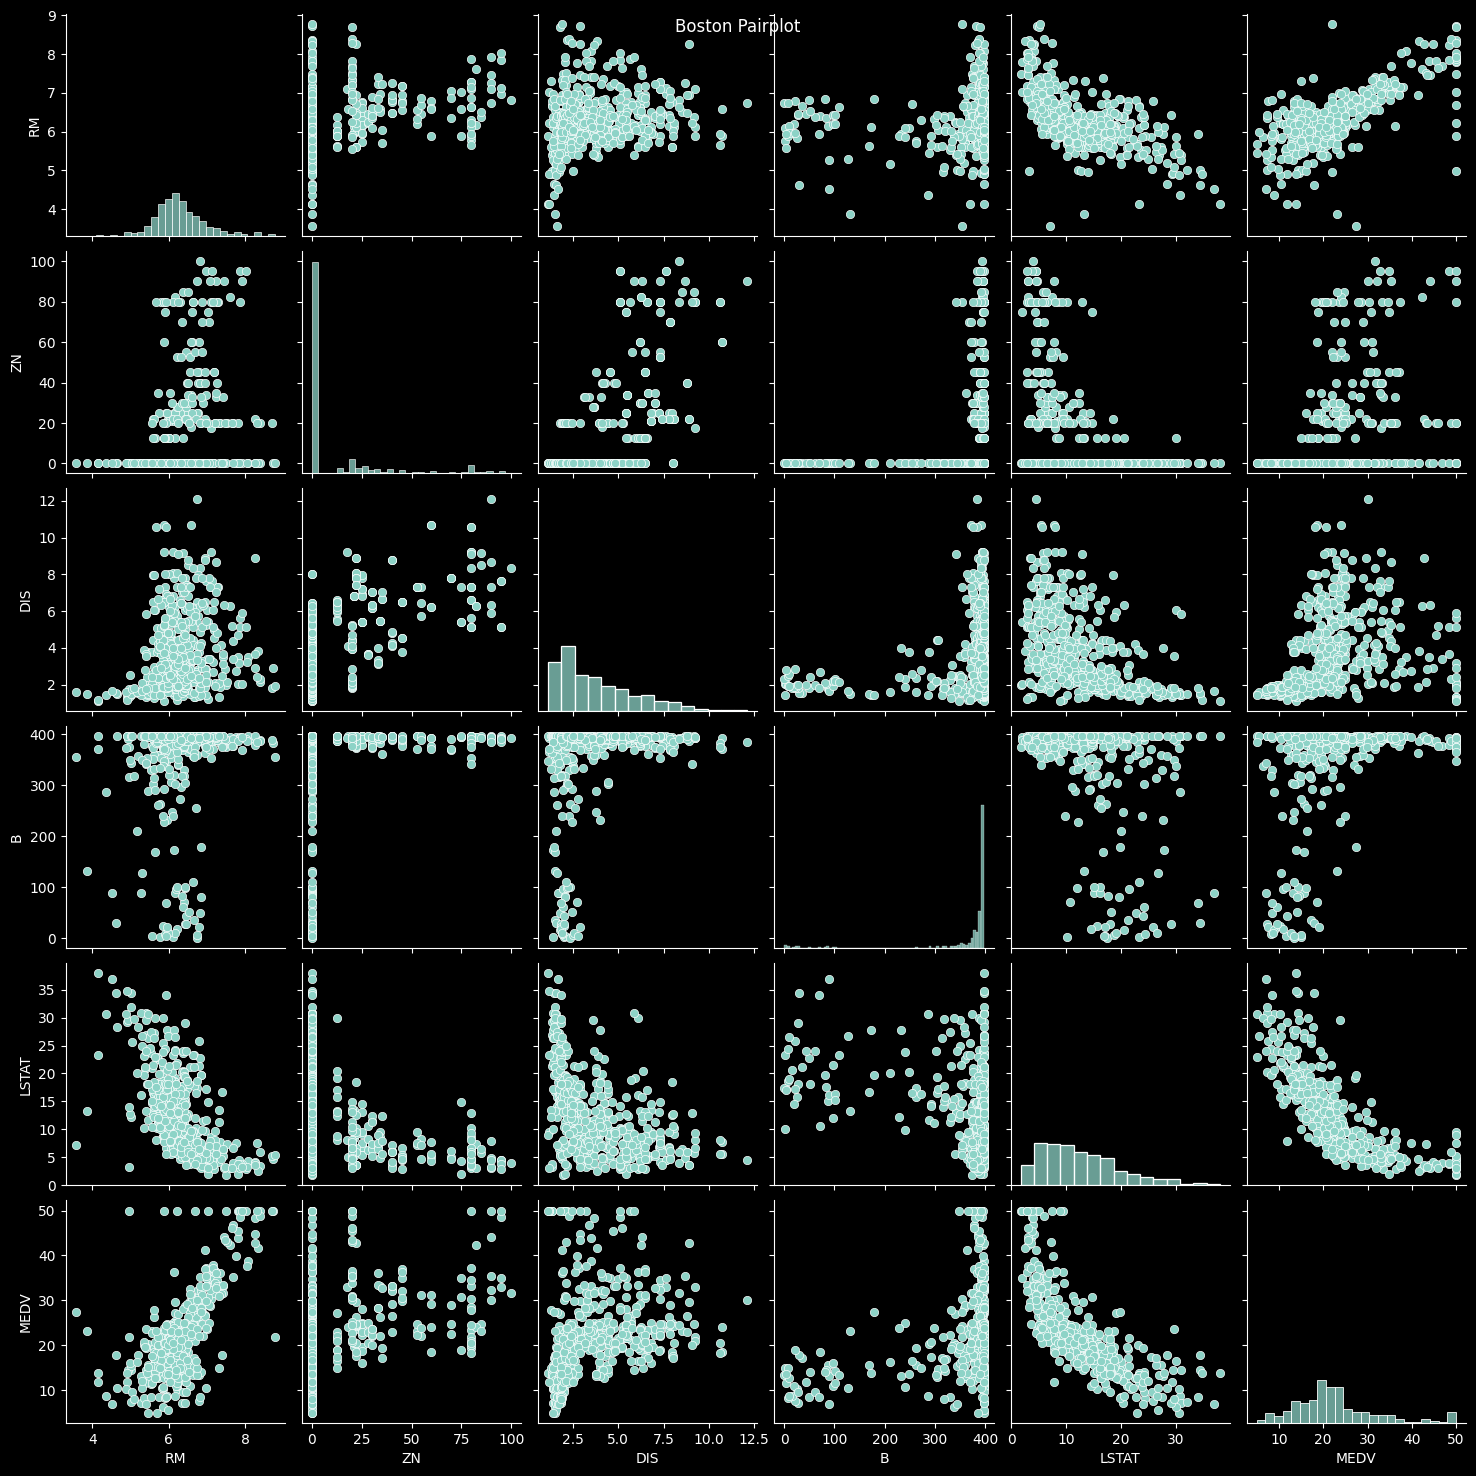

In [5]:
selected_features = ['RM', 'ZN', 'DIS', 'B', 'LSTAT', 'MEDV']
sns.pairplot(data[selected_features])
plt.suptitle("Boston Pairplot")
plt.show()

---
# Choosing the right feature
1. We need to look at the plot of selected features paired with __MEDV__ (price).
2. The one that can resembe a straight line should be chosen.
3. In this case, it is: __RM - the number of rooms__

---
# Taking (x, y) values from dataset

- 'x' must be 'DataFrame' (pandas.core.frame.DataFrame)
- 'y' must be 'Series' (pandas.core.series.Series)

In [6]:
x = data[["RM"]]
y = data["MEDV"]

---
# Initialize the LinearRegression Model

In [7]:
model = LinearRegression()

---
# Split the data into 'Training' and 'Testing' parts

1. Training part is used to train the model
2. Testing part is used to measure the model's error (MSE, MAS, R^2)

- __test_size__ => the size of 'Training part' (0.3 -> 30%)
- __random_state__ => the randomness while splitting data into 'Training' and 'Testing' parts (some values work better)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

---
# Train the model with 'Training' part

In [9]:
model.fit(x_train,y_train)

LinearRegression()

---
# Predict 'Testing' part with the 'Trained Model'

In [10]:
y_pred = model.predict(x_test)

---
# Measure Model's accuracy

- **MSE** - ```Mean Squared Error``` -> It is better to approach to 0 (zero)
- **MAS** - ```Mean Abosulte Error``` -> It is better to approach to 0 (zero)
- **r2** - ```R-Squared Error``` -> It is better to approach to 1 (one)

In [11]:
mse = mean_squared_error(y_test,y_pred)
mas = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"MSE: {mse}")
print(f"MAS: {mas}")
print(f"R^2: {r2}")

MSE: 25.030545380827323
MAS: 3.5500898446943268
R^2: 0.6178518043569179


---
# Linear Regression Model = Equation of a Line

Since Linear Regression Model mathematically based on the equation of Line. It is possible to use it manually.

y=k*x+b

In [12]:
k = model.coef_ # Getting coefficient
b = model.intercept_ # Getting interception

print(k[0],b)

test_x = [[5.813],[6.377]]
test_y = [14.5, 15]

y_manual = [k[0]*(test_x[0][0])+b,k[0]*(test_x[1][0])+b]
y_model = model.predict(test_x)

print(y_manual)
print(y_model)

8.842185590209677 -32.930772337209376
[np.float64(18.468852498679475), np.float64(23.455845171557733)]
[18.4688525  23.45584517]


d:\Career\Programming\Python\AI\ai_course\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


---
# Plotting out Linear Regression Model

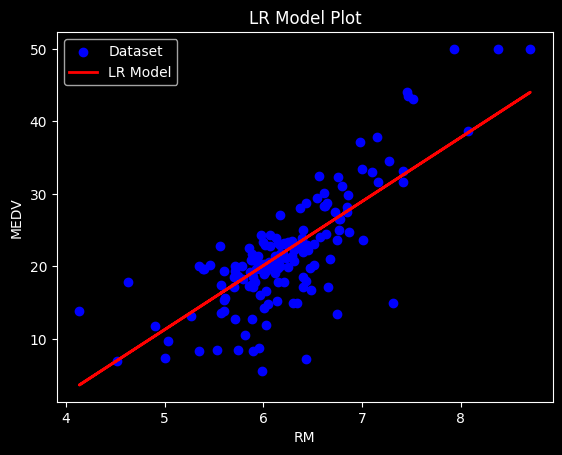

In [13]:
plt.scatter(x_test, y_test, color='blue', label='Dataset') # To put datapoints
plt.plot(x_test, y_pred, color='red', linewidth=2, label='LR Model') # To draw lines
plt.title("LR Model Plot")
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.legend()
plt.show()

---
# Training Model with multiple properties

In [14]:
x = data.drop("MEDV", axis=1) # To take everything except 'MEDV' by axis=1 which means column
y = data["MEDV"]

model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
mas = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"MSE: {mse}")
print(f"MAS: {mas}")
print(f"R^2: {r2}")

MSE: 18.60219336052116
MAS: 3.081985413223105
R^2: 0.715995216261967


---
# 3D Plot

In [15]:
x = data[["RM", "ZN"]]
y = data["MEDV"]

model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
mas = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"MSE: {mse}")
print(f"MAS: {mas}")
print(f"R^2: {r2}")

MSE: 25.225582636243196
MAS: 3.7418829793971806
R^2: 0.6148741171309158


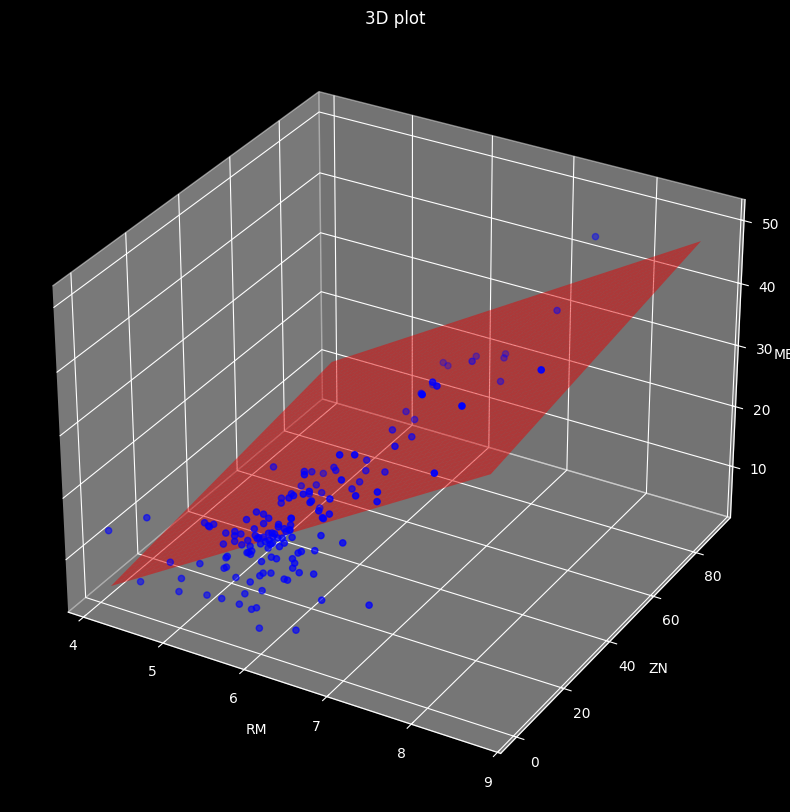

In [16]:
import numpy as np

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_test['RM'], x_test['ZN'], y_test, c='blue', marker='o', label="Actual data")

rm_range = np.linspace(x_test['RM'].min(), x_test['RM'].max(), 50)
zn_range = np.linspace(x_test['ZN'].min(), x_test['ZN'].max(), 50)
rm_range, zn_range = np.meshgrid(rm_range, zn_range)

medv_range = model.predict(pd.DataFrame({'RM': rm_range.flatten(), 'ZN': zn_range.flatten()}))
medv_range = medv_range.reshape(rm_range.shape)

ax.plot_surface(rm_range, zn_range, medv_range, color='red', alpha=0.5, label='Predicted regression surface')


ax.set_xlabel('RM')
ax.set_ylabel('ZN')
ax.set_zlabel('MEDV')

ax.set_title('3D plot')
plt.show()